#**heart failure prediction**

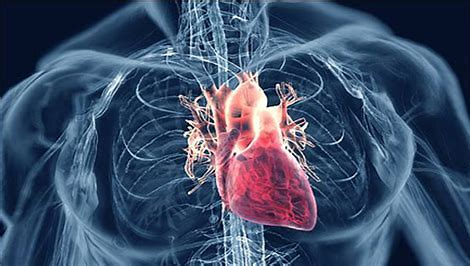

# Loading data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\win 11\Downloads\heart.xls")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Age: Age of the individual.

Sex: Gender of the individual (M for male, F for female).

ChestPainType: Type of chest pain reported by the individual.

Common types include:

ATA: Atypical angina

NAP: Non-anginal pain

ASY: Asymptomatic (no chest pain)

TA:Thoracic Aortic

RestingBP: Resting blood pressure of the individual.

Cholesterol: Cholesterol levels of the individual.

FastingBS: Fasting blood sugar level (0 if normal, 1 if elevated).

RestingECG: Resting electrocardiographic results:

Normal: Normal ECG reading

ST: ST-T wave abnormality

MaxHR: Maximum heart rate achieved during exercise.

ExerciseAngina: Whether the individual experienced angina (chest pain)

during exercise (Y for yes, N for no).

Oldpeak: ST depression induced by exercise relative to rest.

ST_Slope: Slope of the peak exercise ST segment:

Up: Upsloping

Flat: Flat

HeartDisease: Target variable indicating presence (1) or absence (0) of
heart disease.

In [5]:
print("number of rows=",df.shape[0])
print("number of columns=",df. shape[1])

number of rows= 918
number of columns= 12



#**Data preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Get overoll describtion about data

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Encoding catogrical data

In [10]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [11]:
from sklearn.preprocessing import LabelEncoder
for feature in cat_col:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#**Data analysis**

# Draw correlation matrix


<Axes: >

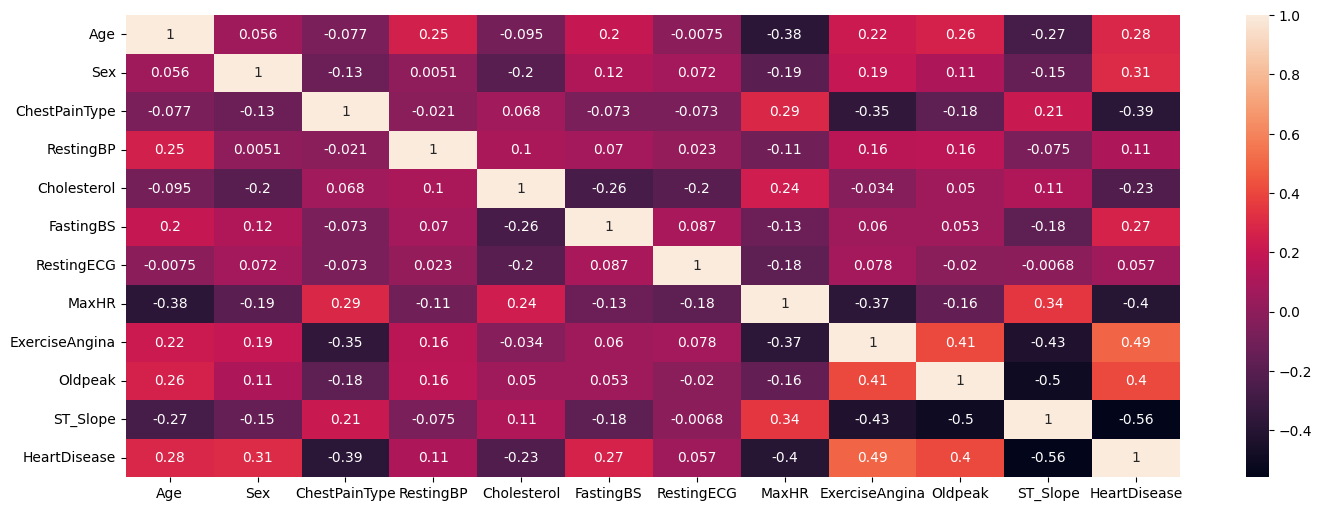

In [13]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

0.0 - 0.1: Negligible correlation

0.1 - 0.3: Weak correlation

0.3 - 0.5: Moderate correlation

0.5 - 0.7: Strong correlation

0.7 - 1.0: Very strong correlation
SO....
we more interset with oldpeak , exerciseAngina and Sex


In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Howmany people have heart failure


In [15]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

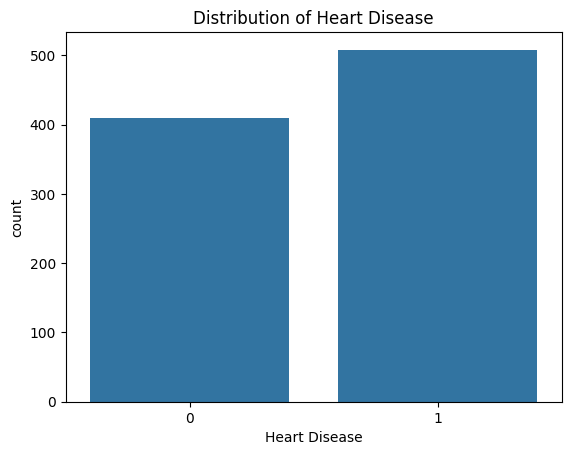

In [16]:
sns.countplot(x="HeartDisease", data=df)
plt.xlabel("Heart Disease")
plt.title("Distribution of Heart Disease")
plt.show()


#Find count of male & female in data set

>



In [17]:
df["Sex"].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

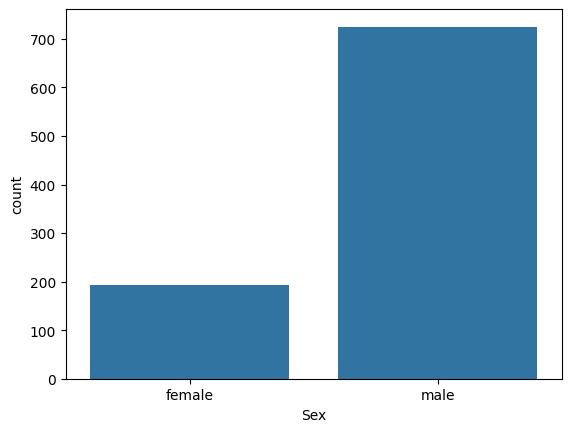

In [18]:
sns.countplot(x="Sex", data=df)
plt.xticks([0,1],['female','male'])
plt.show()

#Gender distribution according to the target


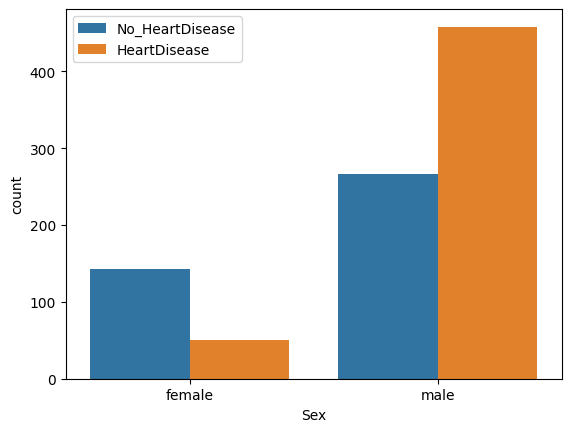

In [19]:
sns.countplot(x="Sex",hue="HeartDisease",data=df)
plt.xticks([1,0],["male",'female'])
plt.legend(labels=["No_HeartDisease",'HeartDisease'])
plt.show()

#ExerciseAngina distribution according to the targert

In [20]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
0    547
1    371
Name: count, dtype: int64

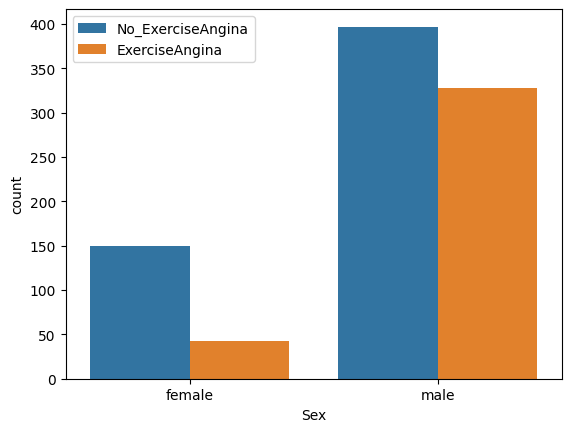

In [21]:
sns.countplot(x="Sex",hue="ExerciseAngina",data=df)
plt.xticks([1,0],["male",'female'])
plt.legend(labels=["No_ExerciseAngina",'ExerciseAngina'])
plt.show()


#Check age distibution in dataset


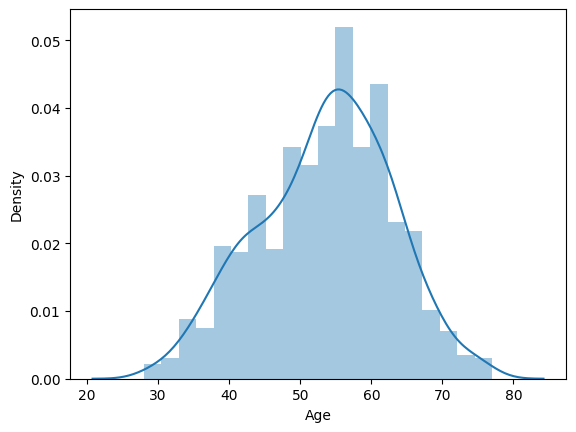

In [22]:
sns.distplot(df['Age'],bins=20)
plt.show()

#chest pain type
ChestPainType:

ASY:value 0

ATA:value 1

NAP: value 2

TA:value 3

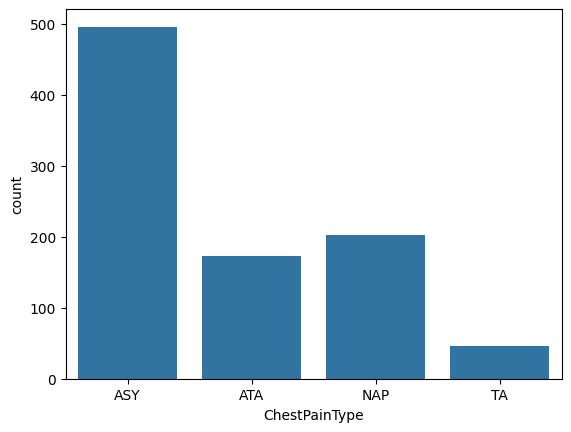

In [23]:
sns.countplot(x="ChestPainType",data=df)
plt.xticks([0,1,2,3],["ASY","ATA","NAP","TA"])
plt.show()

# Chest pain distribution As per targrt


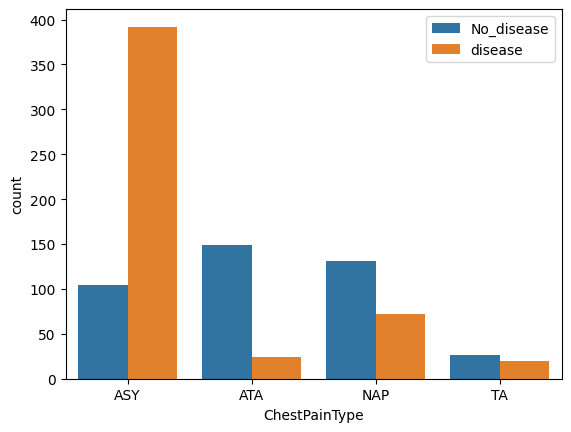

In [24]:
sns.countplot(x="ChestPainType",hue="HeartDisease",data=df)
plt.legend(labels=["No_disease","disease"])
plt.xticks([0,1,2,3],["ASY","ATA","NAP","TA"])
plt.show()

#Check FastingBS distribution


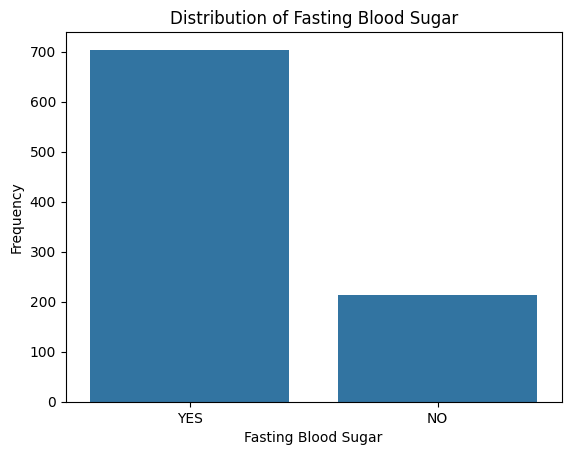

In [25]:
sns.countplot(x="FastingBS", data=df)
plt.xticks([0,1],["YES","NO"])
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.show()

#FastingBS distribution As per targrt


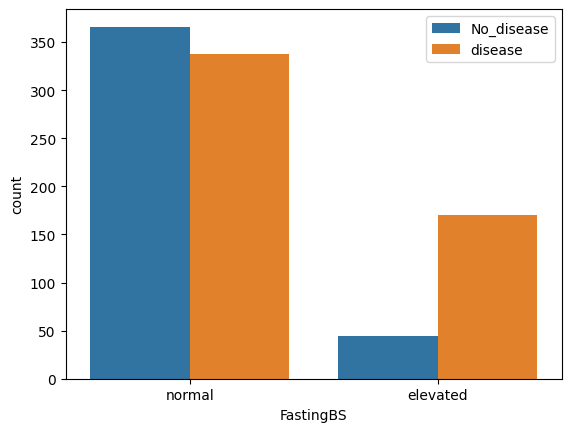

In [26]:
sns.countplot(x="FastingBS",hue="HeartDisease",data=df)
plt.legend(labels=["No_disease","disease"])
plt.xticks([0,1],["normal","elevated"])
plt.show()

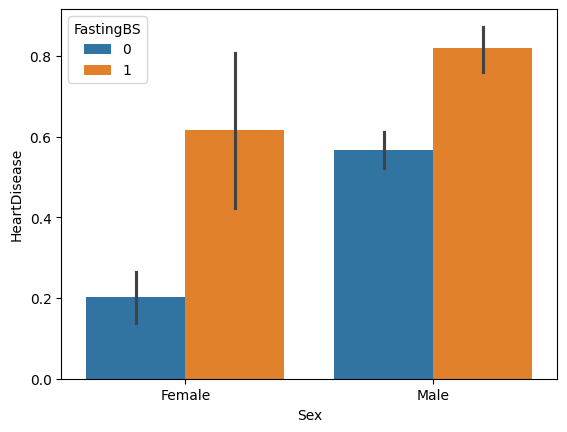

In [27]:
sns.barplot(x="Sex",y="HeartDisease",hue="FastingBS",data=df)
plt.xticks([0,1],["Female","Male"])
plt.show()

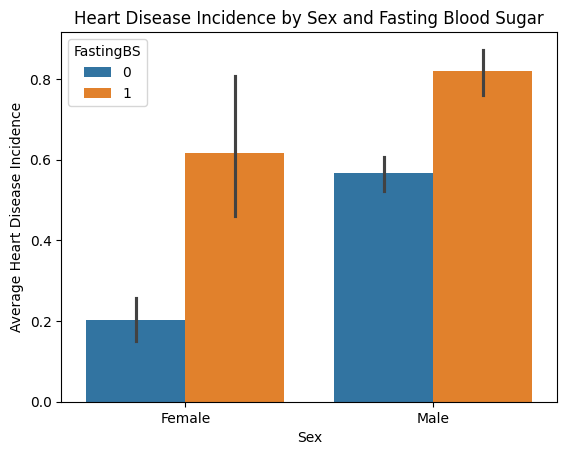

In [28]:
sns.barplot(x="Sex", y="HeartDisease", hue="FastingBS", data=df)

# Set custom x-axis labels: 0 -> Female, 1 -> Male
plt.xticks([0, 1], ["Female", "Male"])

# Set the title and axis labels for better readability
plt.title('Heart Disease Incidence by Sex and Fasting Blood Sugar')
plt.xlabel('Sex')
plt.ylabel('Average Heart Disease Incidence')

# Display the plot
plt.show()

In [29]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

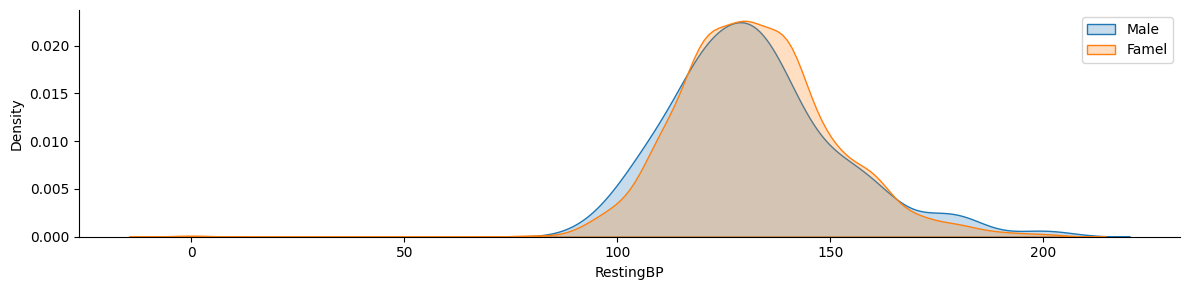

In [30]:
g=sns.FacetGrid(df,hue="Sex",aspect=4)
g.map(sns.kdeplot,"RestingBP",shade=True)
plt.legend(labels=["Male","Famel"])
plt.show()

# Show distribution of Cholesterol


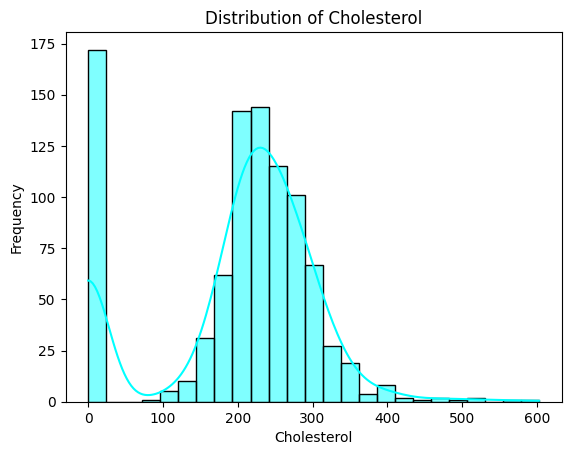

In [31]:
sns.histplot(df["Cholesterol"], bins=25, color="cyan", kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
# plt.legend(labels=[f"Skewness : {df['Cholesterol'].skew():.2f}"])
plt.show()

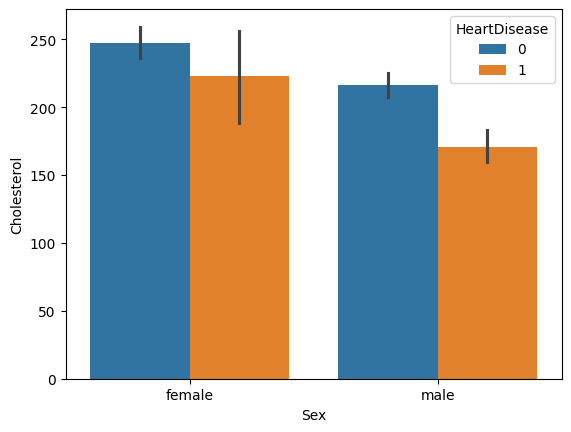

In [32]:
sns.barplot(data=df,x="Sex",y="Cholesterol",hue="HeartDisease")
# plt.legend(labels=["No_disease","disease"])
plt.xticks([1,0],["male",'female'])
plt.show()

In [33]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#Distribution of Oldpeak

<Axes: xlabel='Sex', ylabel='Oldpeak'>

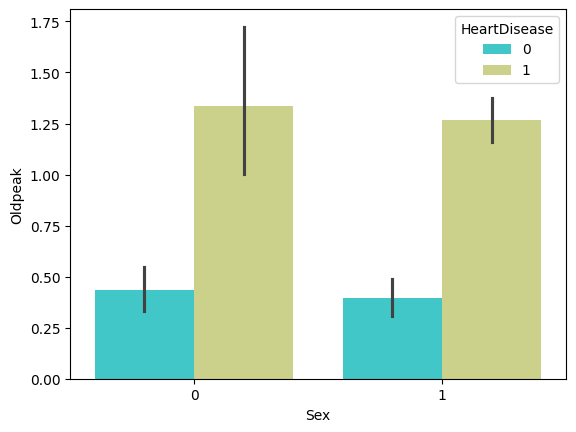

In [34]:
sns.barplot(x="Sex",y="Oldpeak",hue="HeartDisease",palette="rainbow",data=df)

In [35]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Boxplot for checking outliers

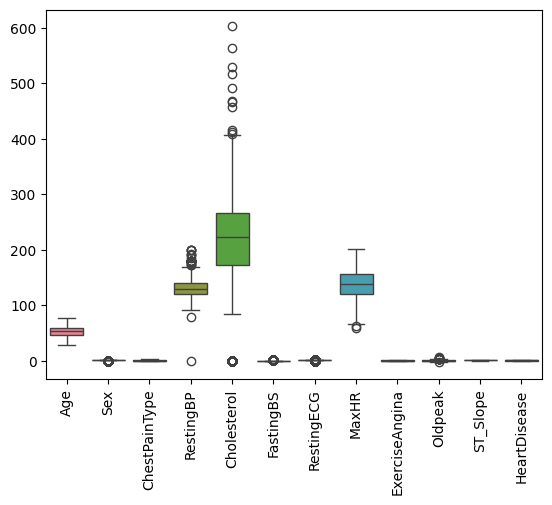

In [36]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

#Nested data


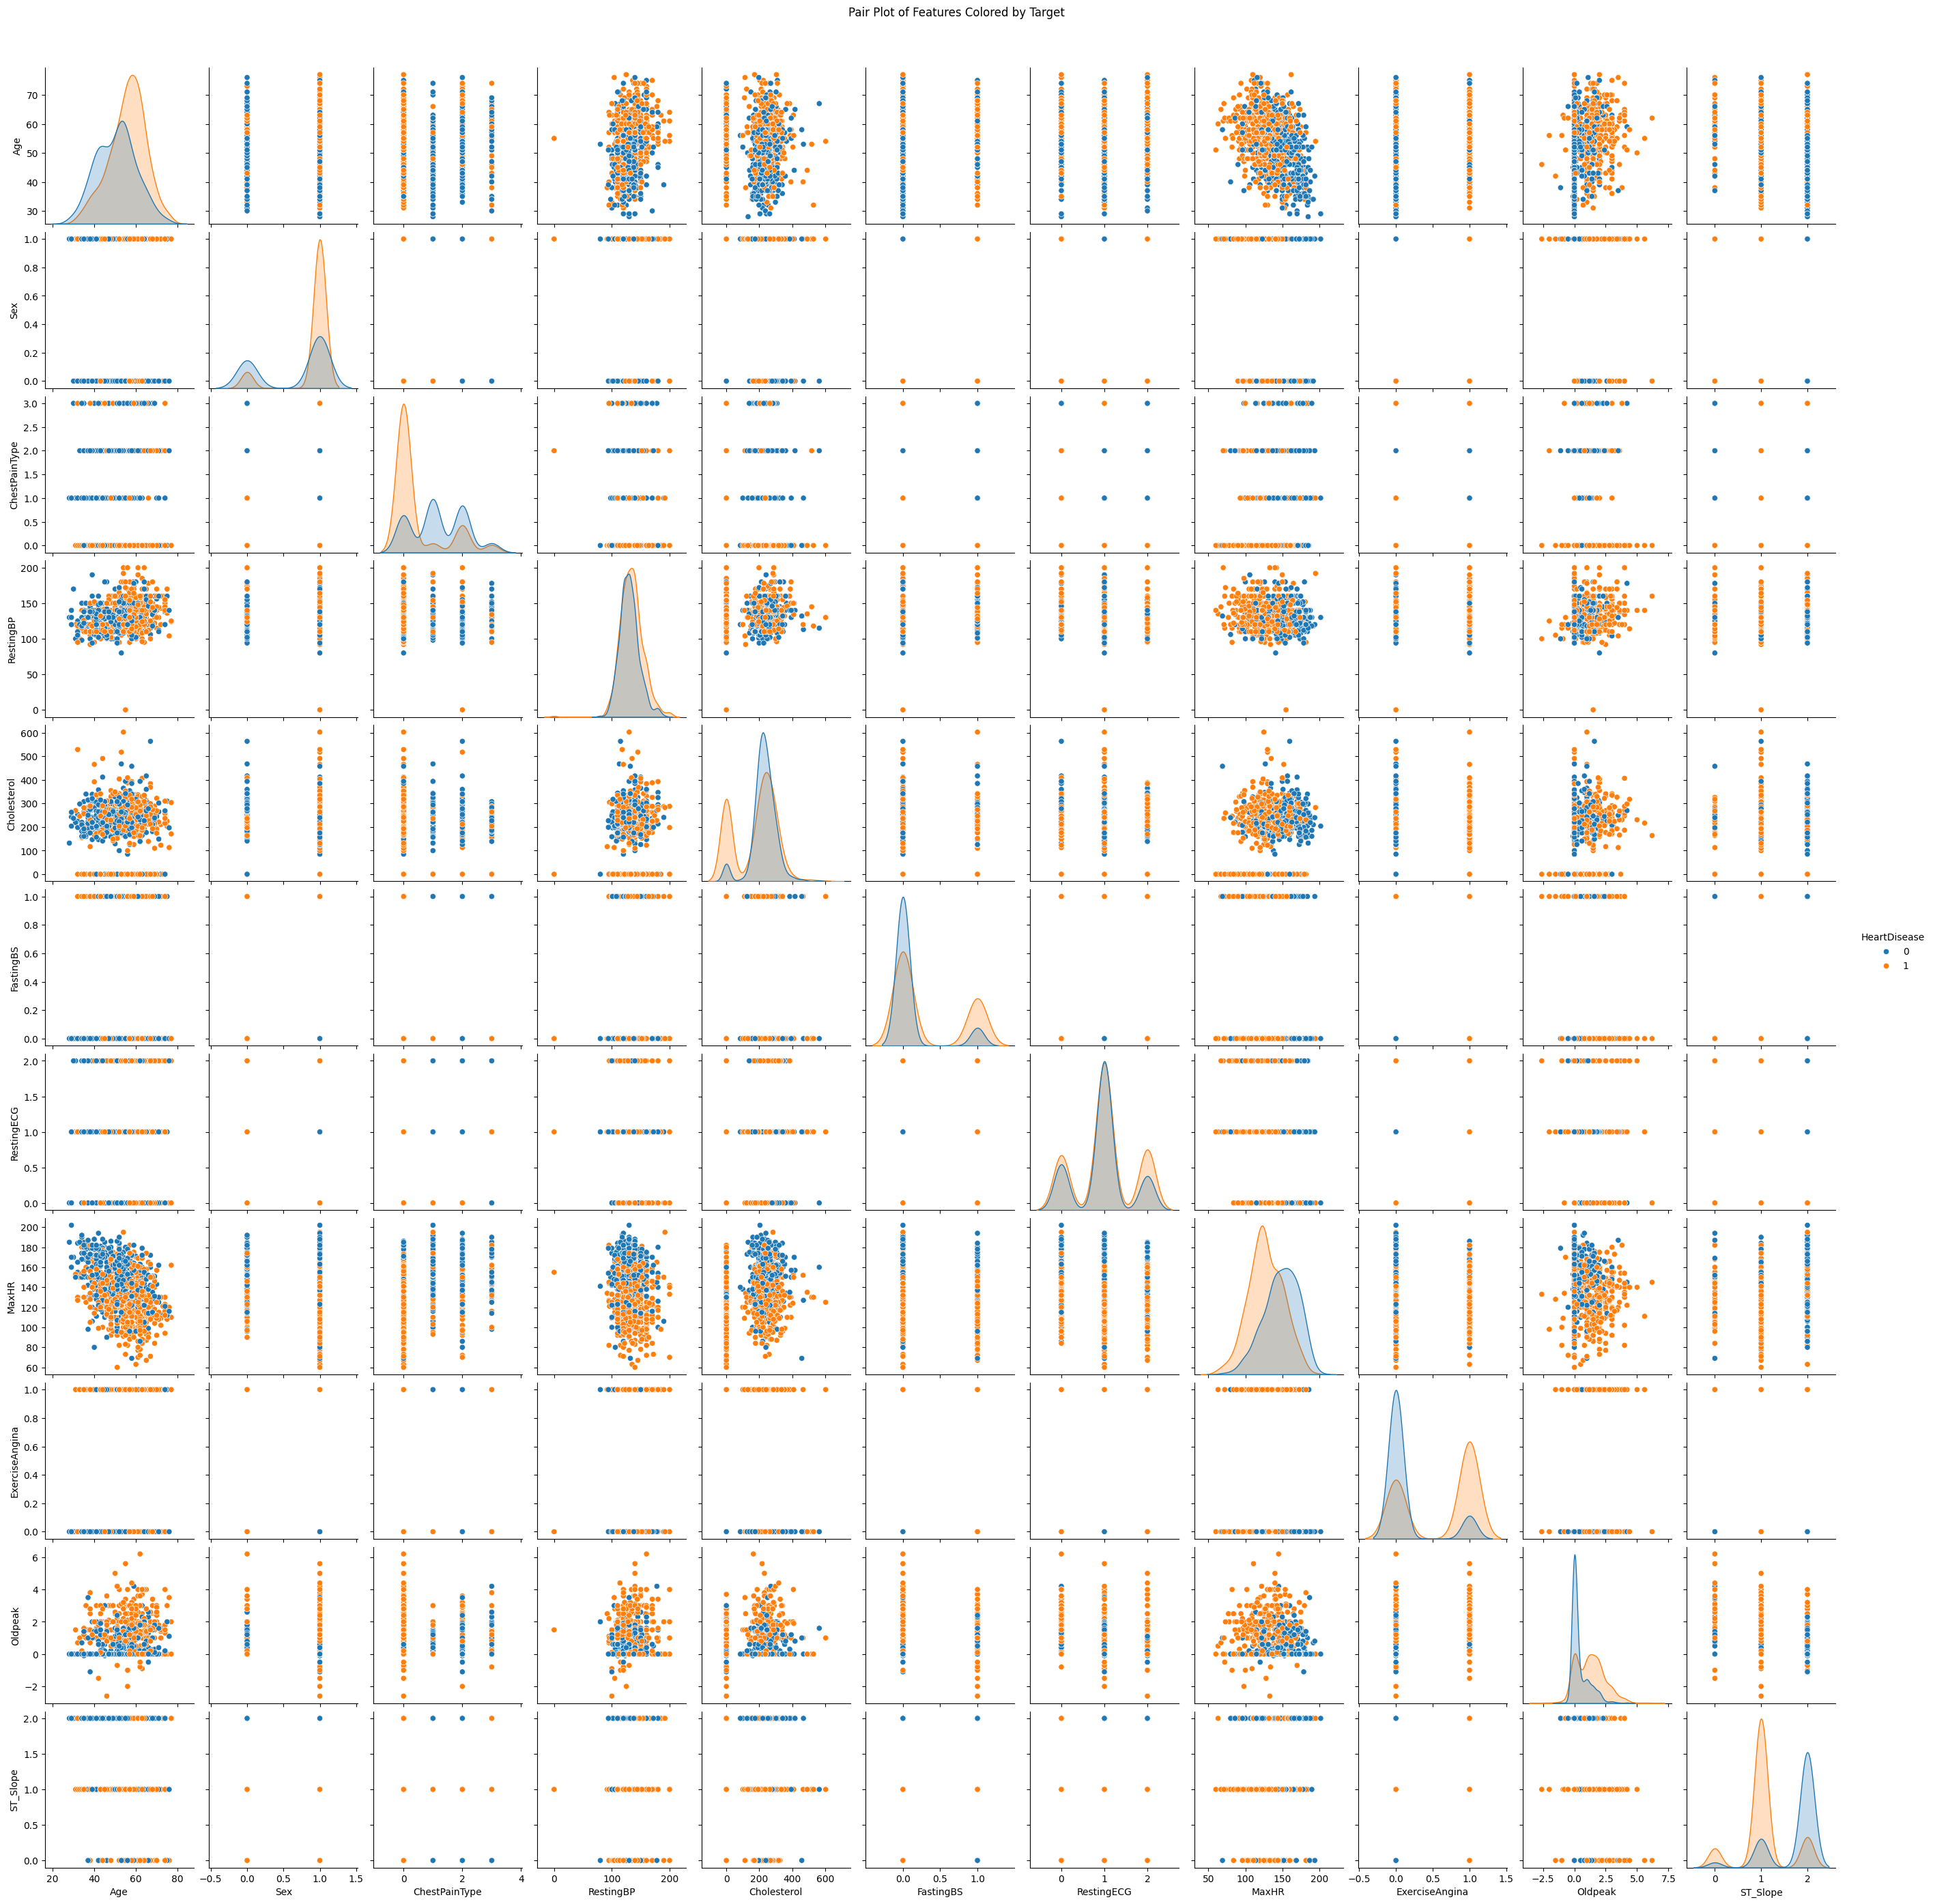

In [37]:
sns.pairplot(df, hue='HeartDisease')
plt.suptitle('Pair Plot of Features Colored by Target', y=1.02)
plt.show()

#Check noises and formats

In [38]:
df["Cholesterol"].min()

0

In [39]:
filtered_df = df[df['Cholesterol'] == 0]
filtered_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,0,115,0,0,1,93,1,0.0,1,1
294,32,1,3,95,0,1,1,127,0,0.7,2,1
295,61,1,0,105,0,1,1,110,1,1.5,2,1
296,50,1,0,145,0,1,1,139,1,0.7,1,1
297,57,1,0,110,0,1,2,131,1,1.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,0,122,0,0,1,120,0,0.5,2,1
515,63,1,2,130,0,1,2,160,0,3.0,1,0
518,48,1,2,102,0,1,2,110,1,1.0,0,1
535,56,1,0,130,0,0,0,122,1,1.0,1,1


In [40]:
df["Cholesterol"].max()

603

In [41]:
df["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [42]:
df["Sex"].unique()

array([1, 0])

In [43]:
df["ChestPainType"].unique()

array([1, 2, 0, 3])

In [44]:
df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [45]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [46]:
df["FastingBS"].unique()

array([0, 1], dtype=int64)

In [47]:
df["RestingECG"].unique()

array([1, 2, 0])

In [48]:
df["MaxHR"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

In [49]:
df["ExerciseAngina"].unique()

array([0, 1])

In [50]:
df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [51]:
df["ST_Slope"].unique()

array([2, 1, 0])

In [52]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [53]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


#Sacling columns


In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Standardization for normal distributed data

df['Oldpeak'] = ss.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])


In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#Spliting data


In [56]:
from sklearn.model_selection import train_test_split
X=df.drop(['HeartDisease'], axis =1)
y=df['HeartDisease']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#**Clasification models**




#Logistic regression model

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg = LogisticRegression()
# Train the model
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Logistic  Accuracy:", accuracy,"%")
print(classification_report(y_test, y_pred))

Accuracy: 88.04347826086956 %
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       128
           1       0.85      0.94      0.89       148

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



#SVM model

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Create an SVM model
svmmodel= SVC(kernel='rbf')
# Train the model
svmmodel.fit(X_train, y_train)
# Predict on the test set
y_pred = svmmodel.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy,"%")
print(classification_report(y_test, y_pred))


Accuracy: 87.31884057971014 %
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       128
           1       0.83      0.95      0.89       148

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



#Dicision tree model

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy,"%")
print(classification_report(y_test, y_pred))

Accuracy: 85.5072463768116 %
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       128
           1       0.83      0.92      0.87       148

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



#**Ensampling models**

#Random forest model

Accuracy: 86.23188405797102
Confusion Matrix:
 [[101  27]
 [ 11 137]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       128
           1       0.84      0.93      0.88       148

    accuracy                           0.86       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



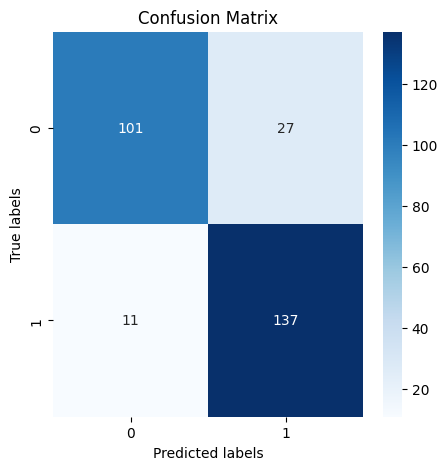

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# GaussianNB model


In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

NB= GaussianNB()
# Train the model
NB.fit(X_train,y_train)
# Predictions
y_pred = NB.predict(X_test)
print('The accuracy of the NaiveBayes is',accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

The accuracy of the NaiveBayes is 88.76811594202898
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       128
           1       0.88      0.92      0.90       148

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



#Bagging model

In [77]:
clf=LogisticRegression()
from sklearn.ensemble import BaggingClassifier

clf_bagging=BaggingClassifier(estimator=clf,n_estimators=10,random_state=42)
clf_bagging.fit(X_train,y_train)
y_pred=clf_bagging.predict(X_test)
print('The accuracy of bagging classifier is',accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

The accuracy of bagging classifier is 88.04347826086956
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       128
           1       0.86      0.93      0.89       148

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



#Boosting model

In [79]:
clf=LogisticRegression()
from sklearn.ensemble import AdaBoostClassifier

clf_boosting=AdaBoostClassifier(estimator=clf,n_estimators=10,random_state=42)
clf_boosting.fit(X_train,y_train)
y_pred=clf_boosting.predict(X_test)
print('The accuracy of boosting classifier is',accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

The accuracy of boosting classifier is 87.68115942028986
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       128
           1       0.87      0.91      0.89       148

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



#Voting model

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier


estimators = [
         ('SVM',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
         ('RF',RandomForestClassifier(n_estimators=500,random_state=0)),
         ('LR',LogisticRegression(C=0.05)),
         ('DT',DecisionTreeClassifier(random_state=0)),
         ('NB',GaussianNB())
                                             ]

clf_Voting=VotingClassifier(estimators=estimators)
clf_Voting.fit(X_train,y_train)
y_pred=clf_Voting.predict(X_test)
print('The accuracy of voting classifier is',accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

The accuracy of voting classifier is 90.21739130434783
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       128
           1       0.87      0.96      0.91       148

    accuracy                           0.90       276
   macro avg       0.91      0.90      0.90       276
weighted avg       0.91      0.90      0.90       276



#Stacking model

In [82]:
from sklearn.ensemble import StackingClassifier

estimators = [
         ('SVM',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
         ('RF',RandomForestClassifier(n_estimators=100,random_state=0)),
         ('LR',LogisticRegression(C=0.05)),
         ('DT',DecisionTreeClassifier(random_state=0)),
         ('NB',GaussianNB())

                                             ]
clf_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_stacking.fit(X_train,y_train)
y_pred=clf_stacking.predict(X_test)
print('The accuracy of stacking classifier is',accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

The accuracy of stacking classifier is 89.4927536231884
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       128
           1       0.87      0.95      0.91       148

    accuracy                           0.89       276
   macro avg       0.90      0.89      0.89       276
weighted avg       0.90      0.89      0.89       276



#**Cross validation**

# k_fold

In [83]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Radial Svm','Decision Tree','Naive Bayes','Random Forest']
models=[LogisticRegression(),SVC(kernel='rbf'),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
comparing_results=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
comparing_results

,CV Mean,Std
Logistic Regression,0.836491,0.049151
Radial Svm,0.864728,0.068059
Decision Tree,0.775490,0.053860
Naive Bayes,0.852879,0.045640
Random Forest,0.870270,0.057540


#**PCA**

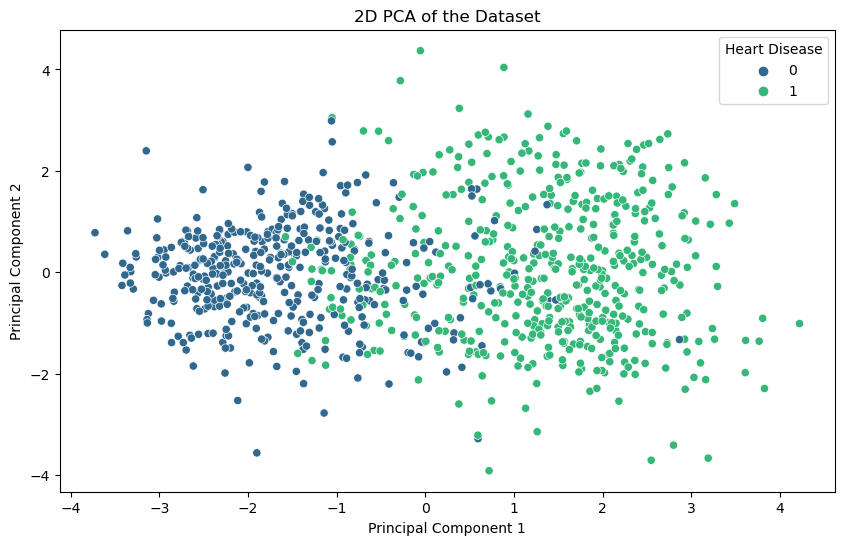

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.select_dtypes(include=[float, int]).columns
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# If you have a target variable for coloring the plot, include it
principal_df['HeartDisease'] = df['HeartDisease']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='HeartDisease', data=principal_df, palette='viridis')

# Adding labels and title
plt.title('2D PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.show()


#**Comparing model's accuracy**

           Model  Accuracy (%)
0       Logistic         88.04
1            SVM         87.32
2  Decision Tree         85.51
3  Random Forest         86.23
4    Naive Bayes         88.77
5        Bagging         88.04
6       Boosting         87.68
7         Voting         90.22
8       Stacking         89.49


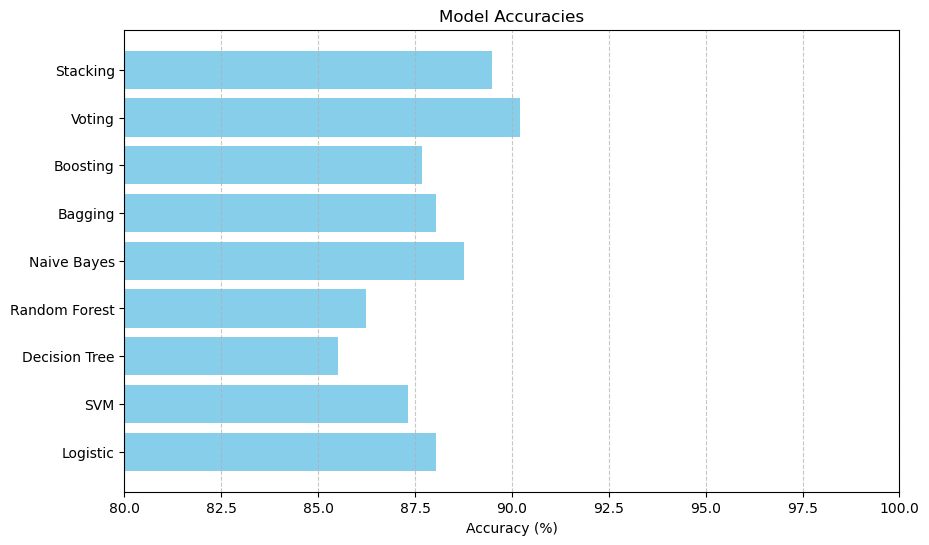

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with accuracy results
comparing_results = pd.DataFrame({
    'Model': ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Bagging', 'Boosting', 'Voting', 'Stacking'],
    'Accuracy (%)': [88.04, 87.32, 85.51, 86.23, 88.77, 88.04, 87.68, 90.22, 89.49]
})

# Display the DataFrame
print(comparing_results)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(comparing_results['Model'], comparing_results['Accuracy (%)'], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.xlim(80, 100)  # Set limit for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#**Deployment**

In [84]:
import joblib
joblib.dump(clf_Voting, 'HeartFailurePrediction.pkl')

['HeartFailurePrediction.pkl']